## File parser - section 3
Data from key:value-like file formats (e.g., .XML or .json files) can also be extracted using pattern recognition tools, i.e. regular expressions (regex).

In order to exclusively match the information we are looking for, we need to define patterns that are matched against the file content. Besides classic control characters like e.g., `\t` for tab or `\n` for newline, regex also allows to match very specific characters and combinations. A good start to look at is www.regex101.com, an online tool that allows you to interactively apply regular expression patterns and see match information in real time; just paste your test string and start develop your pattern!
Please note that the quick reference on the lower right panel highlights possible pattern expressions.

I have created a [shareable example](https://regex101.com/r/G4YWyB/1) for the following exercise, in which the sample name is exemplary matched. (Please note that i have reduced the number of intensity counts in this online version for performance reasons.)


In this notebook, we again want to plot XRD data, again from a `xrdml` file.

- import `re` and `matplotlib`
- define the `filePath` variable pointing on a `xrdml` file
- read the content into `fileString`
- define a pattern that matches the sample name `pattern_name = r'...'`
- compile a regular expression pattern using `re_name = re.compile(pattern_name)`
- extract the string following this pattern using `match = re_name.findall(fileString)`
- print out `match`

In [7]:
import re
filePath = '../2023_0217_MB1_1.xrdml'
with open(filePath, 'r') as file:
    fileString = file.read()

pattern_name = r'<sample.*>\n\t*<id>(.*)<\/id>'
re_name = re.compile(pattern_name)
# needs ...[0], because we want to access the group of our first match
match = re_name.findall(fileString)[0]

print(match)

0217_MB1_1


Pattern explanation for `'<sample.*>\n\t*<id>(.*)<\/id>'`:

- `sample` matches "sample"
- `.` matches any character, `*` means `zero or more` times the character/expression defined before
- `>` matches the character ">"
- `\n\t*` matches "newline" followed by `zero or more` times "tab"
- `<id>` matches "<id>"
- `(.*)` matches any character via `.` for `zero or more` times via `*`. The round brackets let us extract this information as a capturing group, i.e., the portion we want to extract ultimately.
- `<\/id>` matches `<\id>`, which represents the end of our pattern to be matched. Please note that a backslash `\` needs to be escaped `\/` in order to be recognized as a character.

Wrapped up:
- `<sample.*>` matches the sample tag including any attribute (in our case the ` type="To be analyzed"` portion)
- `\n\t*` matches newline plus several tabs
- `<id>(.*)<\/id>` matches the `id` tag including everything `.*` within it. The round brackets around `(.*)` define a group, making it possible to extract just the information of interest (, i.e., the name itself) from within our pattern.


As next information we need to extract the `<intensities>...<\intensities>` entry, our y-axis data.

- define a pattern to grab intensity values as a capture group from within the `<intensities>...<\intensities>` tag
- use `findall()` to extract information from the capture group into a `match` variable
- create an empty list `y`
- write a loop to iteratively access individual intensities within `match` using `split()` and `append()` these as `float()` to `y`
-


In [8]:
pattern_intensities = re.compile(r"<intensities.*>(.*)<\/intensities>")
match = pattern_intensities.findall(fileString)[0]
y = [int(_) for _ in match.split(' ')]
print(y)

[1227, 1148, 1226, 1100, 1149, 1137, 1068, 1043, 1018, 1047, 970, 924, 899, 850, 883, 845, 814, 769, 777, 714, 784, 688, 737, 662, 609, 511, 516, 516, 501, 436, 415, 433, 402, 366, 406, 385, 358, 406, 348, 388, 394, 377, 373, 376, 335, 335, 397, 376, 372, 376, 344, 348, 356, 356, 382, 352, 385, 360, 335, 324, 395, 339, 344, 332, 363, 392, 397, 357, 345, 343, 387, 393, 327, 368, 379, 355, 361, 373, 396, 356, 358, 347, 332, 356, 365, 351, 336, 316, 360, 346, 340, 374, 335, 337, 323, 360, 366, 353, 345, 355, 347, 354, 323, 366, 307, 332, 357, 323, 339, 330, 396, 351, 338, 327, 351, 319, 351, 339, 355, 330, 302, 337, 356, 309, 338, 358, 354, 308, 361, 352, 322, 353, 355, 347, 311, 330, 384, 289, 311, 347, 329, 336, 354, 344, 346, 353, 329, 370, 322, 325, 338, 319, 319, 306, 308, 298, 346, 330, 290, 347, 319, 309, 309, 327, 330, 328, 300, 324, 360, 372, 330, 276, 344, 317, 339, 314, 332, 365, 287, 317, 338, 368, 368, 330, 323, 319, 303, 321, 317, 317, 325, 385, 336, 329, 392, 328, 309, 385,

The xrdml format stores 2Theta values (x-axis) using `StartPosition` and `EndPosition` as `xMin` and `xMax`, respectively.

- Define a pattern that contains two capture groups, which match both `StartPosition` and `EndPosition` and store the values in `xMin` and `xMax` variables.
- The x-array is generated using the `xMin` and `xMax` variables in combination with the number of measurements (`len(y)`). Create a list in which the number of values matches that of `y`, and the minimum and maximum values are `xMin` and `xMax`, respectively.


In [9]:
pattern_angles = re.compile(r'<positions axis="2Theta" unit="deg">\n\t*<startPosition>(\d{1,3}\.\d{1,9})<\/startPosition>\n\t*<endPosition>(\d{1,3}\.\d{1,9})<\/endPosition>')
match = pattern_angles.findall(fileString)[0]
xMin, xMax = float(match[0]), float(match[1])
xRange = xMax - xMin
xStep = xRange/(len(y)-1)
x = [i*xStep +xMin for i in range(len(y))]
print(x)

[2.50417782, 2.512533454532624, 2.520889089065247, 2.529244723597871, 2.537600358130494, 2.5459559926631177, 2.5543116271957413, 2.5626672617283646, 2.5710228962609882, 2.579378530793612, 2.587734165326235, 2.596089799858859, 2.604445434391482, 2.6128010689241057, 2.6211567034567294, 2.6295123379893526, 2.6378679725219762, 2.6462236070545995, 2.654579241587223, 2.662934876119847, 2.67129051065247, 2.6796461451850937, 2.6880017797177174, 2.6963574142503406, 2.7047130487829643, 2.7130686833155875, 2.721424317848211, 2.729779952380835, 2.738135586913458, 2.7464912214460817, 2.7548468559787054, 2.7632024905113286, 2.7715581250439523, 2.7799137595765755, 2.788269394109199, 2.796625028641823, 2.804980663174446, 2.8133362977070697, 2.821691932239693, 2.8300475667723166, 2.8384032013049403, 2.8467588358375635, 2.855114470370187, 2.8634701049028104, 2.871825739435434, 2.8801813739680577, 2.888537008500681, 2.8968926430333046, 2.9052482775659283, 2.9136039120985515, 2.921959546631175, 2.93031518

In a final step, create a function `parse_xrdml`, which takes `filePath` as input argument and returns `x`, `y` and `name` by copying the code fragments developed above. This enables us to easily plot multiple spectra within one plot.

- create a `list` containing the 3 filenames
- iterate over the `list`, invoke the function in every step to receive `x`,`y` and the sample name to plot the respective spectrum, taking the sample name as label
- create a legend & axis labels
- Please place `plt.show()` outside/behind the loop, in order to receive 1 plot with 3 spectra instead of 3 individual plots.

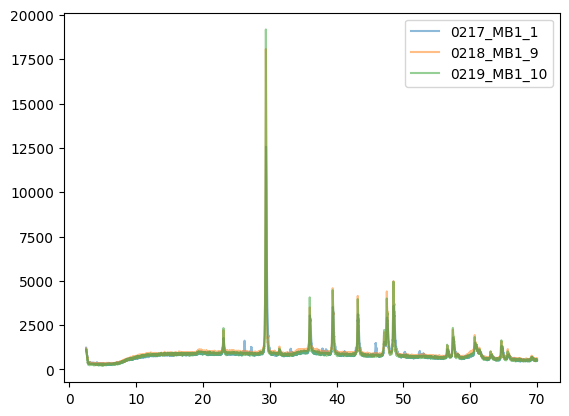

In [10]:
def parse_xrdml(filePath):
    with open(filePath, 'r') as file:
        fileString = file.read()

    pattern_name = re.compile(r'<sample.*>\n\t*<id>(.*)<\/id>')
    # needs ...[0], because we want to access the group of our first match
    match = pattern_name.findall(fileString)[0]
    name = match

    pattern_intensities = re.compile(r"<intensities.*>(.*)<\/intensities>")
    match = pattern_intensities.findall(fileString)[0]
    y = [int(_) for _ in match.split(' ')]

    pattern_angles = re.compile(r'<positions axis="2Theta" unit="deg">\n\t*<startPosition>(\d{1,3}\.\d{1,9})<\/startPosition>\n\t*<endPosition>(\d{1,3}\.\d{1,9})<\/endPosition>')
    match = pattern_angles.findall(fileString)[0]
    xMin, xMax = float(match[0]), float(match[1])
    xRange = xMax - xMin
    xStep = xRange/(len(y)-1)
    x = [i*xStep +xMin for i in range(len(y))]

    return x,y, name

import matplotlib.pyplot as plt

files = [
"../2023_0217_MB1_1.xrdml",
"../2023_0218_MB1_9.xrdml",
"../2023_0219_MB1_10.xrdml",
]

for file in files:
    x,y, id = parse_xrdml(file)
    plt.plot(x,y,
             alpha=0.5,
             label=id)

plt.legend()
plt.show()